In [38]:
import numpy as np
import matplotlib.pyplot as plt

import pickle
import gzip
from matplotlib import rc
import warnings

plt.style.use('seaborn-v0_8-white')
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
warnings.filterwarnings("ignore")

In [39]:
def load_data(filename):
    with gzip.open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

In [40]:
loaded_data_1 = load_data('simulations/1_p53_chaos_576by768.pkl.gz')
loaded_data_2 = load_data('simulations/2_p53_chaos_576by768.pkl.gz')
loaded_data_3 = load_data('simulations/3_p53_chaos_576by768.pkl.gz')

In [41]:
def concatenate_datasets(datasets, keys):
    """
    Concatenates fields from multiple datasets.

    Parameters:
    - datasets: List of dictionaries, where each dictionary represents a dataset.
    - keys: List of strings, representing keys to concatenate in the datasets.

    Returns:
    - A dictionary with the same keys, containing concatenated arrays from all datasets.
    """
    # Initialize a dictionary to hold concatenated arrays for each key
    concatenated = {key: [] for key in keys}
    
    # Iterate over each dataset
    for data in datasets:
        # For each key, append the array (or list) from the dataset to the corresponding list in `concatenated`
        for key in keys:
            current_array = data[key]
            if key == 'calculated_ratio':  # Convert to numpy array if key matches 'calculated_ratio'
                current_array = np.array(current_array)
            concatenated[key].append(current_array)
    
    # For each key, concatenate the lists of arrays into a single array
    for key in concatenated:
        if key == 'calculated_ratio':  # Ensure we use numpy.concatenate for numpy arrays
            concatenated[key] = np.concatenate(concatenated[key])
        else:  # Use a simple list concatenation for other keys
            concatenated[key] = sum(concatenated[key], [])
    
    return concatenated

In [42]:
concat = concatenate_datasets([loaded_data_1, loaded_data_2, loaded_data_3], ["Omega", "coupling_strength", "exception", "calculated_ratio", "entrainment_value"])

In [47]:
threshold = 0.01
tunger = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]
tunger_v2 = np.linspace(0.1,3.5,30)

colors = ['C0', 'C1', 'C2', 'C6', 'C7', 'C8', 'C9']
colors_v2 = ["red", "orange", "blue", "magenta", "green", "cyan", "darkviolet"]
arnold_color_scheme = ["#DAE0DC", "#56445D", "#A26769", "#9CB380", "#508AA8", "#C8EAD3", "#31474D", '#DAE0DC', "#548687"]
label = ["0", fr"$\frac{1}{2}$", "1", fr"$\frac{3}{2}$", "2", fr"$\frac{5}{2}$", "3", fr"$n\cdot0.1$"] 

def get_color_map(Entrainments, tunger, threshold, colors):
    color_map = []

    for entrainment in Entrainments:
        # Initialize the color to white (default color)
        color = 'white'

        # Check if entrainment falls within any of the specified ranges
        for i, start in enumerate(tunger_v2):
            if start - threshold <= entrainment <= start + threshold:
                color = '#DAE0DC'
                break  # Break out of the loop once a matching range is found

        # Check if entrainment falls within any of the specified ranges
        for i, start in enumerate(tunger):
            if start - threshold <= entrainment <= start + threshold:
                color = arnold_color_scheme[i]
                break  # Break out of the loop once a matching range is found

        color_map.append(color)

    return color_map

color_map = get_color_map(np.array(concat["calculated_ratio"]), tunger, threshold, colors)

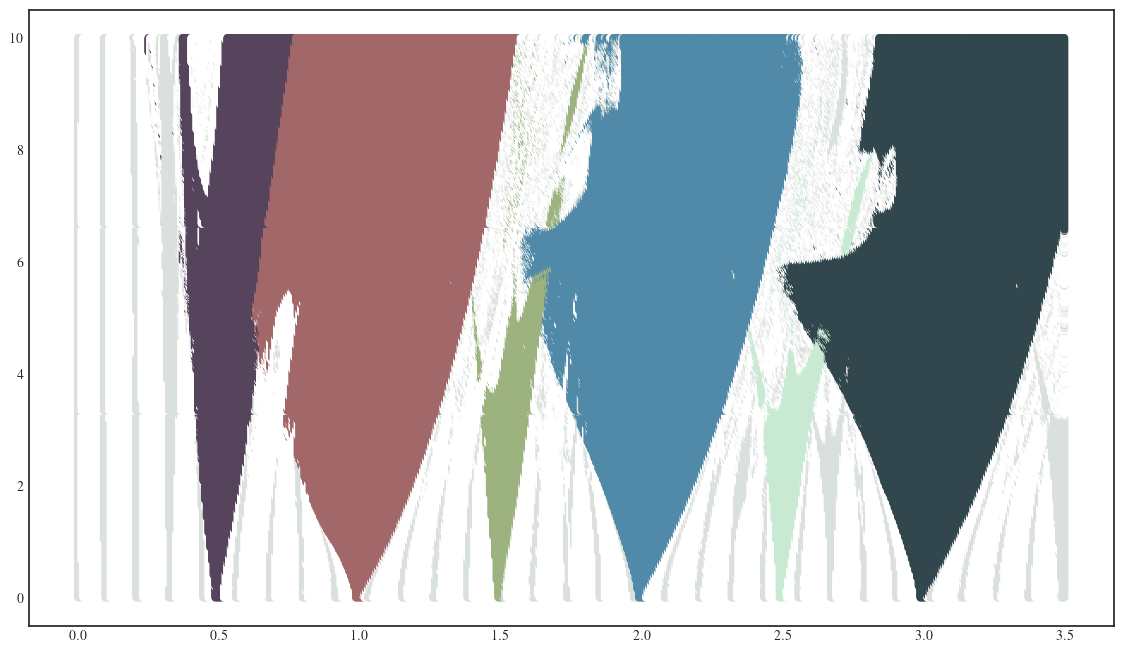

In [48]:
plt.figure(figsize=(14,8))

plt.scatter(concat["Omega"], concat["coupling_strength"], c=color_map, s=20, marker="o")

In [9]:
Omegas_tested_1 = loaded_data_1["Omega"]
Coupling_strengths_tested_1 = loaded_data_1["coupling_strength"]
Exceptions_1 = loaded_data_1["exception"]
Ratios_1 = np.array(loaded_data_1["calculated_ratio"])

In [61]:
# Omegas_tested_2 = loaded_data_2["Omega"]
# Coupling_strengths_tested_2 = loaded_data_2["coupling_strength"]
# Exceptions = loaded_data_2["exception"]
# Ratios_2 = np.array(loaded_data_2["calculated_ratio"])

# Omegas_tested_3 = loaded_data_3["Omega"]
# Coupling_strengths_tested_3 = loaded_data_3["coupling_strength"]
# Exceptions_3 = loaded_data_3["exception"]
# Ratios_3 = np.array(loaded_data_3["calculated_ratio"])

# Omegas_tested_4 = loaded_data_4["Omega"]
# Coupling_strengths_tested_4 = loaded_data_4["coupling_strength"]
# Exceptions_4 = loaded_data_4["exception"]
# Ratios_4 = np.array(loaded_data_4["calculated_ratio"])

# omegas_third = np.concatenate((Omegas_tested_3, Omegas_tested_4))
# ratios_third = np.concatenate((Ratios_3, Ratios_4))
# exceptions_third = np.concatenate((Exceptions_3, Exceptions_4))
# coupling_strengts_third = np.concatenate((Coupling_strengths_tested_3, Coupling_strengths_tested_4))

# Omegas_tested_5 = loaded_data_5["Omega"]
# Coupling_strengths_tested_5 = loaded_data_5["coupling_strength"]
# Exceptions_5 = loaded_data_5["exception"]
# Ratios_5 = np.array(loaded_data_5["calculated_ratio"])

# Omegas_tested_6 = loaded_data_6["Omega"]
# Coupling_strengths_tested_6 = loaded_data_6["coupling_strength"]
# Exceptions_6 = loaded_data_6["exception"]
# Ratios_6 = np.array(loaded_data_6["calculated_ratio"])

In [20]:
color_map_1 = [
    'C0' if ratio - 1e-3 <= 0 <= ratio + 1e-3 else
    'C2' if ratio - 8e-3 <= 0.1 <= ratio + 8e-3 else
    'C3' if ratio - 1e-3 <= 0.2 <= ratio + 1e-3 else
    'C4' if ratio - 1e-3 <= 0.3 <= ratio + 1e-3 else
    'C5' if ratio - 1e-3 <= 0.4 <= ratio + 1e-3 else
    # 'C5' if ratio - 1e-2 <= 3/4 <= ratio + 1e-2 else
    # 'C1' if ratio - 1e-2 <= 1/1 <= ratio + 1e-2 else
    # 'C2' if ratio - 1e-2 <= 3/2 <= ratio + 1e-2 else
    # # 'C9' if ratio - 1e-2 <= 1.97 <= ratio + 1e-2 else
    # 'C6' if ratio - 1e-2 <= 4/2 <= ratio + 1e-2 else
    # 'C4' if ratio - 1e-2 <= 5/2 <= ratio + 1e-2 else
    # 'C9' if ratio - 1e-2 <= 6/2 <= ratio + 1e-2 else
    'red' if Exceptions_1[i] == True else
    'gray'
    for i, ratio in enumerate(Ratios_1.ravel())
]

In [74]:
color_map_2 = [
    # 'C7' if ratio - 1e-2 <= 1/4 <= ratio + 1e-2 else
    # 'C3' if ratio - 1e-2 <= 1/3 <= ratio + 1e-2 else
    'C0' if ratio - 1e-2 <= 2/4 <= ratio + 1e-2 else
    # 'C5' if ratio - 1e-2 <= 3/4 <= ratio + 1e-2 else
    'C1' if ratio - 1e-2 <= 1/1 <= ratio + 1e-2 else
    'C2' if ratio - 1e-2 <= 3/2 <= ratio + 1e-2 else
    # 'C9' if ratio - 1e-2 <= 1.97 <= ratio + 1e-2 else
    'C6' if ratio - 1e-2 <= 4/2 <= ratio + 1e-2 else
    'C4' if ratio - 1e-2 <= 5/2 <= ratio + 1e-2 else
    'C9' if ratio - 1e-2 <= 6/2 <= ratio + 1e-2 else
    'red' if Exceptions_2[i] == True else
    'white'
    for i, ratio in enumerate(Ratios_2.ravel())
]

In [75]:
color_map_3 = [
    # 'C7' if ratio - 1e-2 <= 1/4 <= ratio + 1e-2 else
    # 'C3' if ratio - 1e-2 <= 1/3 <= ratio + 1e-2 else
    'C0' if ratio - 1e-2 <= 2/4 <= ratio + 1e-2 else
    # 'C5' if ratio - 1e-2 <= 3/4 <= ratio + 1e-2 else
    'C1' if ratio - 1e-2 <= 1/1 <= ratio + 1e-2 else
    'C2' if ratio - 1e-2 <= 3/2 <= ratio + 1e-2 else
    # 'C9' if ratio - 1e-2 <= 1.97 <= ratio + 1e-2 else
    'C6' if ratio - 1e-2 <= 4/2 <= ratio + 1e-2 else
    'C4' if ratio - 1e-2 <= 5/2 <= ratio + 1e-2 else
    'C9' if ratio - 1e-2 <= 6/2 <= ratio + 1e-2 else
    'red' if Exceptions_3[i] == True else
    'white'
    for i, ratio in enumerate(Ratios_3.ravel())
]

color_map_4 = [
    # 'C7' if ratio - 1e-2 <= 1/4 <= ratio + 1e-2 else
    # 'C3' if ratio - 1e-2 <= 1/3 <= ratio + 1e-2 else
    'C0' if ratio - 1e-2 <= 2/4 <= ratio + 1e-2 else
    # 'C5' if ratio - 1e-2 <= 3/4 <= ratio + 1e-2 else
    'C1' if ratio - 1e-2 <= 1/1 <= ratio + 1e-2 else
    'C2' if ratio - 1e-2 <= 3/2 <= ratio + 1e-2 else
    # 'C9' if ratio - 1e-2 <= 1.97 <= ratio + 1e-2 else
    'C6' if ratio - 1e-2 <= 4/2 <= ratio + 1e-2 else
    'C4' if ratio - 1e-2 <= 5/2 <= ratio + 1e-2 else
    'C9' if ratio - 1e-2 <= 6/2 <= ratio + 1e-2 else
    'red' if Exceptions_4[i] == True else
    'white'
    for i, ratio in enumerate(Ratios_4.ravel())
]

color_map_5 = [
    # 'C7' if ratio - 1e-2 <= 1/4 <= ratio + 1e-2 else
    # 'C3' if ratio - 1e-2 <= 1/3 <= ratio + 1e-2 else
    'C0' if ratio - 1e-2 <= 2/4 <= ratio + 1e-2 else
    # 'C5' if ratio - 1e-2 <= 3/4 <= ratio + 1e-2 else
    'C1' if ratio - 1e-2 <= 1/1 <= ratio + 1e-2 else
    'C2' if ratio - 1e-2 <= 3/2 <= ratio + 1e-2 else
    # 'C9' if ratio - 1e-2 <= 1.97 <= ratio + 1e-2 else
    'C6' if ratio - 1e-2 <= 4/2 <= ratio + 1e-2 else
    'C4' if ratio - 1e-2 <= 5/2 <= ratio + 1e-2 else
    'C9' if ratio - 1e-2 <= 6/2 <= ratio + 1e-2 else
    'red' if Exceptions_5[i] == True else
    'white'
    for i, ratio in enumerate(Ratios_5.ravel())
]

color_map_6 = [
    # 'C7' if ratio - 1e-2 <= 1/4 <= ratio + 1e-2 else
    # 'C3' if ratio - 1e-2 <= 1/3 <= ratio + 1e-2 else
    'C0' if ratio - 1e-2 <= 2/4 <= ratio + 1e-2 else
    # 'C5' if ratio - 1e-2 <= 3/4 <= ratio + 1e-2 else
    'C1' if ratio - 1e-2 <= 1/1 <= ratio + 1e-2 else
    'C2' if ratio - 1e-2 <= 3/2 <= ratio + 1e-2 else
    # 'C9' if ratio - 1e-2 <= 1.97 <= ratio + 1e-2 else
    'C6' if ratio - 1e-2 <= 4/2 <= ratio + 1e-2 else
    'C4' if ratio - 1e-2 <= 5/2 <= ratio + 1e-2 else
    'C9' if ratio - 1e-2 <= 6/2 <= ratio + 1e-2 else
    'red' if Exceptions_6[i] == True else
    'white'
    for i, ratio in enumerate(Ratios_6.ravel())
]

Text(0.5, 0, 'External / Internal Period')

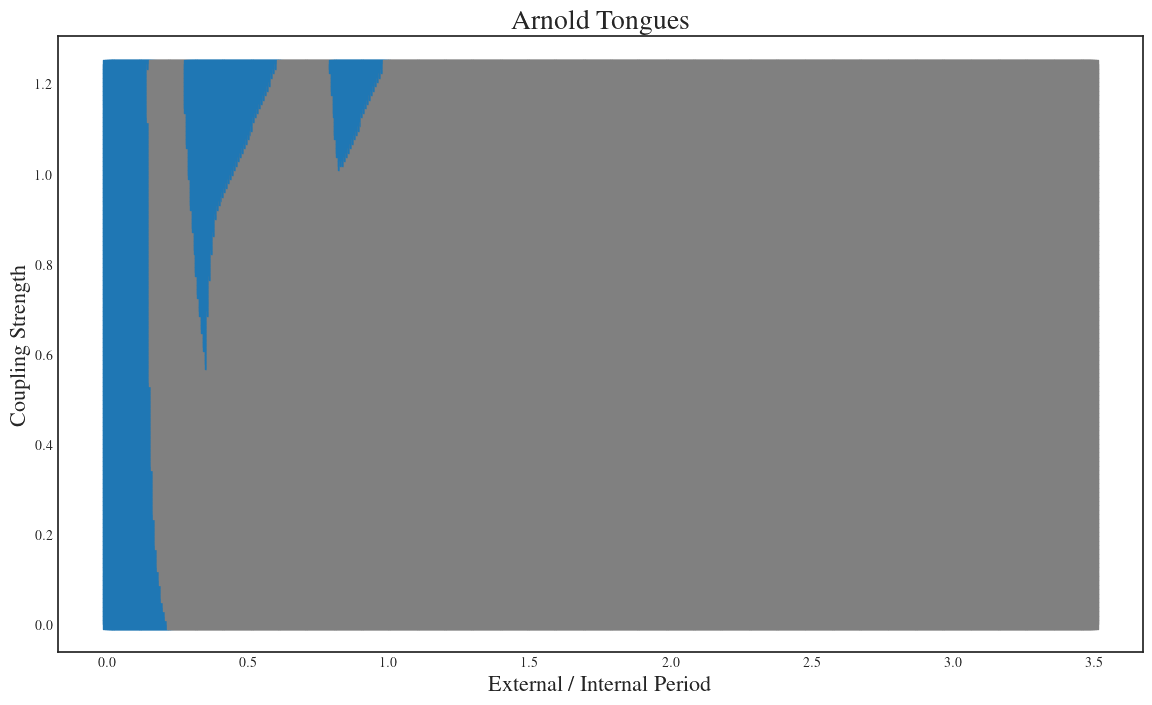

In [21]:
plt.figure(figsize=(14,8))

plt.scatter(Omegas_tested_1, Coupling_strengths_tested_1, c=color_map_1, s=40, marker="s")
# plt.scatter(Omegas_tested_2, Coupling_strengths_tested_2, c=color_map_2, s=40, marker="s")
# plt.scatter(Omegas_tested_4, Coupling_strengths_tested_4, c=color_map_4, s=40, marker="s")
# plt.scatter(Omegas_tested_5, Coupling_strengths_tested_5, c=color_map_5, s=40, marker="s")
# plt.scatter(Omegas_tested_6, Coupling_strengths_tested_6, c=color_map_6, s=40, marker="s")
# plt.scatter(Omegas_tested_2, Coupling_strengths_tested_2, c=color_map_2, s=40, marker="s")

plt.title("Arnold Tongues", fontsize=20)
plt.ylabel("Coupling Strength", fontsize=16)
plt.xlabel("External / Internal Period", fontsize=16)